## Model Fitting and Evaluating
### Linear Regression
#### X-y split (y is the target variable, in this case, "total claim amount").
#### Train-test split.
#### Standardize the data (after the data split!).
#### Apply linear regression.
#### Model Interpretation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:
pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
categorical = df.select_dtypes(include=['object', 'category'])
numerical = df.select_dtypes(include=['int', 'float'])
print("Categorical variables:")
print(categorical.columns)
print("\nNumerical variables:")
print(numerical.columns)

Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


### X-y split (y is the target variable, in this case, "total claim amount").

In [6]:
X = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto','months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numerical['total_claim_amount']

### Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print (X_train)

       customer_lifetime_value  income  monthly_premium_auto  \
9877                     21423   22379                    65   
10069                     8391   40211                   106   
10317                     3969   49544                   101   
9796                     14914   45963                    63   
8995                     18060   57882                   115   
...                        ...     ...                   ...   
5734                      7610   98701                    94   
5191                     35186   86134                    98   
5390                      4241   19834                    64   
860                      12941   77060                   106   
7270                      6947   63406                   100   

       months_since_last_claim  months_since_policy_inception  \
9877                         9                             31   
10069                        5                             98   
10317                        3      

In [9]:
print (X_test)

       customer_lifetime_value  income  monthly_premium_auto  \
3487                      4871   72648                    61   
668                       9233   42600                   115   
10315                     3203   68370                    80   
5332                      5067   61067                    64   
1523                      8427   46503                   215   
...                        ...     ...                   ...   
7089                      3621   13457                    94   
2507                      8283   71034                   103   
7965                      4035   83983                   112   
8523                      7240   32818                    93   
9803                     10280   73661                   128   

       months_since_last_claim  months_since_policy_inception  \
3487                         0                             78   
668                         10                             78   
10315                        0      

In [10]:
print(y_train)

9877     312
10069    710
10317      0
9796     302
8995     552
        ... 
5734      79
5191       3
5390     460
860      468
7270     925
Name: total_claim_amount, Length: 8551, dtype: int64


In [11]:
print (y_test)

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
7089      285
2507      494
7965      537
8523      446
9803      404
Name: total_claim_amount, Length: 2138, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Assume you have X_train and X_test from the train-test split
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print(X_train_scaled)
# Output: Standardized training input features


[[ 1.96075094 -1.19107411 -0.81840932 ... -0.61738859 -0.4172657
  -0.41008382]
 [ 0.05783754 -0.46959622  0.36746951 ...  1.7885401   1.80581156
   1.25775293]
 [-0.58785637 -0.09198556  0.22285014 ... -0.68920736 -0.4172657
  -0.82704301]
 ...
 [-0.54813933 -1.29404412 -0.84733319 ... -1.44330441  4.02888882
   2.09167131]
 [ 0.72222183  1.02130435  0.36746951 ...  1.50126504 -0.4172657
  -0.41008382]
 [-0.15301321  0.46886721  0.19392627 ...  0.20852723 -0.4172657
   1.67471212]]


In [14]:
print(X_test_scaled)
# Output: Standardized testing input features

[[-0.45614766  0.84279603 -0.93410481 ...  1.07035243 -0.4172657
   0.84079374]
 [ 0.18078514 -0.37293792  0.62778438 ...  1.07035243 -0.4172657
   0.00687536]
 [-0.69970656  0.66970931 -0.38455121 ... -0.11465722 -0.4172657
  -0.82704301]
 ...
 [-0.57821915  1.30140706  0.54101276 ...  0.89080552 -0.4172657
  -0.82704301]
 [-0.11022978 -0.768715   -0.00854085 ... -0.33011352 -0.4172657
   2.09167131]
 [ 0.33366653  0.88378173  1.00379474 ... -0.04283845 -0.4172657
   0.00687536]]


### Apply linear regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [17]:
model.intercept_

432.7827154718746

In [18]:
model.coef_

array([-7.44374050e+00, -3.35677864e+01,  1.88742534e+02,  1.27912773e-01,
       -3.00331832e+00,  2.86638652e-01,  2.40707525e+00])

In [19]:
print(model.coef_)
print (model.intercept_)

[-7.44374050e+00 -3.35677864e+01  1.88742534e+02  1.27912773e-01
 -3.00331832e+00  2.86638652e-01  2.40707525e+00]
432.7827154718746


### Model Interpretation

In [27]:
X_test_scaled = np.array(X_test_scaled).reshape(-1,7)

In [21]:
y_test = np.array(y_test).reshape(-1,1)

In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
y_test.shape

(2138, 1)

In [30]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})

In [31]:
compare

,y_test,y_pred
0,[120],230.080624
1,[660],559.062818
2,[244],340.972244
3,[86],268.949617
4,[1032],1104.937431
...,...,...
2133,[285],493.750706
2134,[494],462.964323
2135,[537],490.612535
2136,[446],463.725456


In [32]:
y_test - y_pred

array([[-110.08062389, -439.06281849, -220.97224399, ..., -370.61253546,
        -343.72545559, -470.35490144],
       [ 429.91937611,  100.93718151,  319.02775601, ...,  169.38746454,
         196.27454441,   69.64509856],
       [  13.91937611, -315.06281849,  -96.97224399, ..., -246.61253546,
        -219.72545559, -346.35490144],
       ...,
       [ 306.91937611,  -22.06281849,  196.02775601, ...,   46.38746454,
          73.27454441,  -53.35490144],
       [ 215.91937611, -113.06281849,  105.02775601, ...,  -44.61253546,
         -17.72545559, -144.35490144],
       [ 173.91937611, -155.06281849,   63.02775601, ...,  -86.61253546,
         -59.72545559, -186.35490144]])

### Model Interpretation

In [34]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [35]:
mse(y_test,y_pred)

48603.25525355552

In [36]:
mae(y_test, y_pred)

150.17517808486429

In [37]:
import matplotlib.pyplot as plt

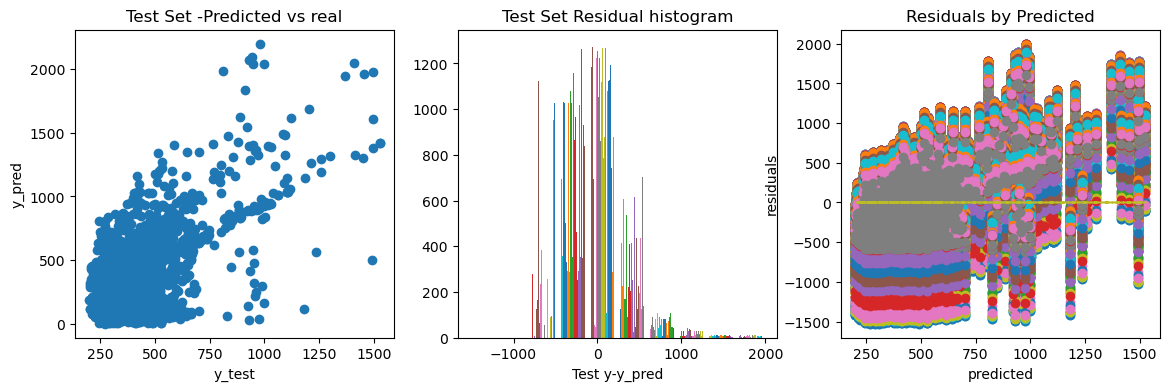

In [38]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')